<a href="https://colab.research.google.com/github/SEC-API-io/sec-api-cookbook/blob/main/notebooks/sec-administrative-proceedings/sec-administrative-proceedings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of SEC Administrative Proceedings with Python

This tutorial provides a step-by-step guide to accessing and analyzing SEC administrative proceedings using Python and the [Administrative Proccedings API](https://sec-api.io/docs/sec-administrative-proceedings-database-api). The dataset for this tutorial contains all SEC administrative proceedings from 1995 to 2024, including parties involved, order types, penalties, and more.

The analysis will cover the following topics:

- Data loading, cleaning, and preprocessing
- Proceedings published per year and month
- Top 10 most common order types
- Penalty amounts per year and respondent type
- And more

## Quick Start

In [ ]:
!pip install sec-api

In [ ]:
# NOTE: Replace with your own API key
API_KEY_SEC_API = "YOUR_API_KEY" 

In [ ]:
from sec_api import SecAdministrativeProceedingsApi

adminProceedingsApi = SecAdministrativeProceedingsApi(API_KEY_SEC_API)

searchRequest = {
    "query": "releasedAt:[2024-01-01 TO 2024-12-31]",
    "from": "0",
    "size": "50",
    "sort": [{"releasedAt": {"order": "desc"}}],
}

response = adminProceedingsApi.get_data(searchRequest)
proceedings = response["data"]

print(f"Loaded first {len(proceedings)} proceedings")

Loaded first 50 proceedings


In [3]:
import pandas as pd

df = pd.DataFrame(proceedings)
df.head()

,id,releasedAt,releaseNo,fileNumbers,respondents,respondentsText,resources,title,summary,tags,...,parallelActionsTakenBy,hasAgreedToSettlement,hasAgreedToPayPenalty,penaltyAmounts,requestedRelief,violatedSections,orders,investigationConductedBy,litigationLedBy,otherAgenciesInvolved
0,0ab80b58b2fcf40e7497aa0000759a37,2024-12-31T12:19:45-05:00,"[34-102060, AAER-4554]",[3-22386],"[{'name': 'Accell Audit & Compliance, PA', 'ty...","Accell Audit & Compliance, PA","[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING PUBLIC ADMINISTRATIVE PROCEE...,The SEC has instituted public administrative p...,"[fraudulent financial reporting, accounting mi...",...,[],True,True,"[{'penaltyAmount': '75000', 'penaltyAmountText...",[],"[Section 10(b) of the Exchange Act, Rule 10b-5]",[Accell is suspended from appearing or practic...,[],[],[]
1,0dbf2331563447a91e64b78077239115,2024-12-30T13:02:35-05:00,[IA-6806],[3-22385],"[{'name': 'Steven J. Susoeff', 'type': 'indivi...",Steven J. Susoeff,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING ADMINISTRATIVE PROCEEDINGS P...,The SEC has instituted administrative proceedi...,"[fraudulent cherry-picking, investment adviser...",...,[],True,False,[],[],"[Sections 17(a) of the Securities Act of 1933,...",[Respondent Susoeff is barred from association...,[],[],[]
2,8ad2aaf148601d33de3460509dd08cec,2024-12-27T17:12:33-05:00,"[34-102047, AAER-4553]",[3-22384],"[{'name': 'Christopher Hiestand', 'type': 'ind...","Christopher Hiestand, CPA","[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING PUBLIC ADMINISTRATIVE PROCEE...,The SEC has instituted public administrative p...,"[fraudulent financial reporting, accounting mi...",...,[],True,True,"[{'penaltyAmount': '50000', 'penaltyAmountText...",[],"[Section 10(b) of the Exchange Act, Rule 10b-5]",[Hiestand is suspended from appearing or pract...,[],[],[]
3,804947f56e7146f94b3ce9bf64d8012a,2024-12-23T14:42:30-05:00,[34-102031],[3-22383],"[{'name': 'Richard Brown', 'type': 'individual...",Richard Brown,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING ADMINISTRATIVE PROCEEDINGS P...,The SEC has instituted administrative proceedi...,"[securities fraud, disclosure fraud]",...,[United States District Court for the Eastern ...,True,False,[],"[disgorgement of profits, civil penalties]","[Section 17(a) of the Securities Act of 1933, ...",[Respondent Brown is barred from association w...,[],[],[]
4,91a2c34129c53e911759a959be1aa829,2024-12-20T17:51:48-05:00,[33-11349],[3-22382],"[{'name': 'Tai Mo Shan Limited', 'type': 'comp...",Tai Mo Shan Limited,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING CEASE-AND-DESIST PROCEEDINGS...,The SEC has instituted cease-and-desist procee...,"[unregistered securities, crypto, misleading c...",...,[],True,True,"[{'penaltyAmount': '73452756', 'penaltyAmountT...","[disgorgement of profits, civil penalties]","[Sections 5(a) and 5(c) of the Securities Act,...",[Respondent Tai Mo Shan cease and desist from ...,[],[],[]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        50 non-null     object
 1   releasedAt                50 non-null     object
 2   releaseNo                 50 non-null     object
 3   fileNumbers               50 non-null     object
 4   respondents               50 non-null     object
 5   respondentsText           50 non-null     object
 6   resources                 50 non-null     object
 7   title                     50 non-null     object
 8   summary                   50 non-null     object
 9   tags                      50 non-null     object
 10  entities                  50 non-null     object
 11  complaints                50 non-null     object
 12  parallelActionsTakenBy    50 non-null     object
 13  hasAgreedToSettlement     50 non-null     bool  
 14  hasAgreedToPayPenalty     50

## Data Loading

In [ ]:
import os
import json
import time
import random
import sys
from concurrent.futures import ThreadPoolExecutor
import pandas as pd
from sec_api import SecAdministrativeProceedingsApi

adminProceedingsApi = SecAdministrativeProceedingsApi(API_KEY_SEC_API)

YEARS = range(2024, 1994, -1) # from 2024 to 2004
TEMP_FILE_TEMPLATE = "./temp_file_{}.jsonl"
TARGET_FILE = "./sec-administrative-proceedings.jsonl"


def process_year(year):
    backoff_time = random.randint(10, 800) / 1000
    print(f"Starting year {year} with backoff time {backoff_time:,}s"); sys.stdout.flush()
    time.sleep(backoff_time)

    tmp_filename = TEMP_FILE_TEMPLATE.format(year)
    tmp_file = open(tmp_filename, "a")

    for month in range(12, 0, -1):
        search_from = 0
        month_counter = 0

        while True:
            query = f"releasedAt:[{year}-{month:02d}-01 TO {year}-{month:02d}-31]"
            searchRequest = {
                "query": query,
                "from": search_from,
                "size": "50",
                "sort": [{"releasedAt": {"order": "desc"}}],
            }

            response = None
            try:
                response = adminProceedingsApi.get_data(searchRequest)
            except Exception as e:
                print(f"{year}-{month:02d} error: {e}"); sys.stdout.flush()
                continue

            if response == None or len(response["data"]) == 0:
                break

            search_from += 50
            month_counter += len(response["data"])
            jsonl_data = "\n".join([json.dumps(entry) for entry in response["data"]])
            tmp_file.write(jsonl_data + "\n")

        print(f"Finished loading {month_counter} proceedings for {year}-{month:02d}")
        sys.stdout.flush()

    tmp_file.close()

    return year



if not os.path.exists(TARGET_FILE):
    with ThreadPoolExecutor(max_workers=4) as pool:
        processed_years = list(pool.map(process_year, YEARS))
    print("Finished processing all years.", processed_years)

    # merge the temporary files into one final file
    with open(TARGET_FILE, "a") as outfile:
        for year in YEARS:
            temp_file = TEMP_FILE_TEMPLATE.format(year)
            if os.path.exists(temp_file):
                with open(temp_file, "r") as infile:
                    outfile.write(infile.read())
else:
    print("File already exists. Skipping download.")

File already exists. Skipping download.


In [6]:
source_file = '/Users/jan/Datasets/SEC-API.io/SEC_Administrative_Proceedings/admin-proceedings-all.jsonl'

# load JSONL into dataframe
df = pd.read_json(TARGET_FILE, lines=True)

# convert "releasedAt" to datetime and to EST timezone
df["releasedAt"] = pd.to_datetime(df["releasedAt"], utc=True)
df["releasedAt"] = df["releasedAt"].dt.tz_convert("US/Eastern")
df["releasedAtYear"] = df["releasedAt"].dt.year
df["releasedAtMonth"] = df["releasedAt"].dt.month
df["releasedAtYearMonth"] = df["releasedAt"].map(lambda x: x.strftime("%Y-%m"))
# Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday
df["releasedAtDay"] = df["releasedAt"].dt.day_name()
df["hasAgreedToSettlement"] = df["hasAgreedToSettlement"].astype(bool)
df["hasAgreedToPayPenalty"] = df["hasAgreedToPayPenalty"].astype(bool)
first_year = df["releasedAtYear"].min(); last_year = df["releasedAtYear"].max()

print(f"Loaded {len(df):,.0f} SEC administrative proceedings from {first_year} to {last_year}\n")
df.head()

Loaded 17,987 SEC administrative proceedings from 1995 to 2024



,id,releasedAt,releaseNo,fileNumbers,respondents,respondentsText,resources,title,summary,tags,...,requestedRelief,violatedSections,orders,investigationConductedBy,litigationLedBy,otherAgenciesInvolved,releasedAtYear,releasedAtMonth,releasedAtYearMonth,releasedAtDay
0,0ab80b58b2fcf40e7497aa0000759a37,2024-12-31 12:19:45-05:00,"[34-102060, AAER-4554]",[3-22386],"[{'name': 'Accell Audit & Compliance, PA', 'ty...","Accell Audit & Compliance, PA","[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING PUBLIC ADMINISTRATIVE PROCEE...,The SEC has instituted public administrative p...,"[fraudulent financial reporting, accounting mi...",...,[],"[Section 10(b) of the Exchange Act, Rule 10b-5]",[Accell is suspended from appearing or practic...,[],[],[],2024,12,2024-12,Tuesday
1,0dbf2331563447a91e64b78077239115,2024-12-30 13:02:35-05:00,[IA-6806],[3-22385],"[{'name': 'Steven J. Susoeff', 'type': 'indivi...",Steven J. Susoeff,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING ADMINISTRATIVE PROCEEDINGS P...,The SEC has instituted administrative proceedi...,"[fraudulent cherry-picking, investment adviser...",...,[],"[Sections 17(a) of the Securities Act of 1933,...",[Respondent Susoeff is barred from association...,[],[],[],2024,12,2024-12,Monday
2,8ad2aaf148601d33de3460509dd08cec,2024-12-27 17:12:33-05:00,"[34-102047, AAER-4553]",[3-22384],"[{'name': 'Christopher Hiestand', 'type': 'ind...","Christopher Hiestand, CPA","[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING PUBLIC ADMINISTRATIVE PROCEE...,The SEC has instituted public administrative p...,"[fraudulent financial reporting, accounting mi...",...,[],"[Section 10(b) of the Exchange Act, Rule 10b-5]",[Hiestand is suspended from appearing or pract...,[],[],[],2024,12,2024-12,Friday
3,804947f56e7146f94b3ce9bf64d8012a,2024-12-23 14:42:30-05:00,[34-102031],[3-22383],"[{'name': 'Richard Brown', 'type': 'individual...",Richard Brown,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING ADMINISTRATIVE PROCEEDINGS P...,The SEC has instituted administrative proceedi...,"[securities fraud, disclosure fraud]",...,"[disgorgement of profits, civil penalties]","[Section 17(a) of the Securities Act of 1933, ...",[Respondent Brown is barred from association w...,[],[],[],2024,12,2024-12,Monday
4,91a2c34129c53e911759a959be1aa829,2024-12-20 17:51:48-05:00,[33-11349],[3-22382],"[{'name': 'Tai Mo Shan Limited', 'type': 'comp...",Tai Mo Shan Limited,"[{'label': 'primary', 'url': 'https://www.sec....",ORDER INSTITUTING CEASE-AND-DESIST PROCEEDINGS...,The SEC has instituted cease-and-desist procee...,"[unregistered securities, crypto, misleading c...",...,"[disgorgement of profits, civil penalties]","[Sections 5(a) and 5(c) of the Securities Act,...",[Respondent Tai Mo Shan cease and desist from ...,[],[],[],2024,12,2024-12,Friday


## Proceedings by Year and Month

In [7]:
import matplotlib.pyplot as plt
import matplotlib.style as style

style.use("default")

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "font.family": "sans-serif",
    "axes.spines.top": False, "axes.spines.right": False, "grid.color": "grey",
    "axes.grid": True, "axes.grid.axis": "y", "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

In [8]:
# piv table with years = index, months = columns, values = count of proceedings
unique_proceedings = df.explode('fileNumbers').drop_duplicates(subset=['fileNumbers'], keep='last')

df_year_month = unique_proceedings.pivot_table(
# df_year_month = df.pivot_table(
    index="releasedAtYear",
    columns="releasedAtMonth",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_month.sum(axis=1)
mean_col = round(df_year_month.mean(axis=1), 0)
median_col = round(df_year_month.median(axis=1), 0)

df_year_month["total"] = total_col
df_year_month["mean"] = mean_col
df_year_month["median"] = median_col

total_row = df_year_month.sum(axis=0)
mean_row = round(df_year_month.mean(axis=0), 0)
median_row = round(df_year_month.median(axis=0), 0)

df_year_month.loc["total"] = total_row
df_year_month.loc["mean"] = mean_row
df_year_month.loc["median"] = median_row

df_year_month = df_year_month.astype(int)

print("SEC Administrative Proceedings by Year and Month")
df_year_month

SEC Administrative Proceedings by Year and Month


releasedAtMonth,1,2,3,4,5,6,7,8,9,10,11,12,total,mean,median
releasedAtYear,,,,,,,,,,,,,,,
1995,0,0,0,0,0,0,0,0,1,11,9,7,28,2,0
1996,25,27,15,9,14,14,11,8,66,19,8,12,228,19,14
1997,17,19,15,17,19,13,10,16,75,6,5,25,237,20,16
1998,15,3,14,19,13,20,21,17,56,16,8,14,216,18,16
1999,19,15,20,24,27,11,10,49,61,14,15,15,280,23,17
2000,4,15,15,19,13,32,9,13,64,12,10,28,234,20,14
2001,8,18,16,10,31,28,14,16,39,15,16,18,229,19,16
2002,20,19,33,25,13,27,36,23,24,18,30,39,307,26,24
2003,23,20,21,20,39,26,30,35,49,33,19,23,338,28,24


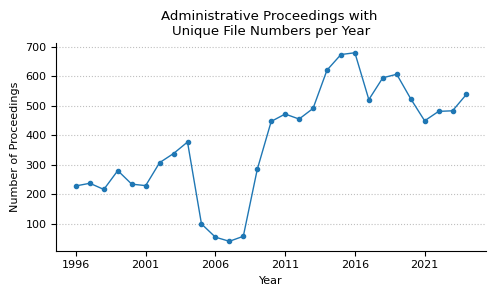

In [9]:
fig, ax = plt.subplots(figsize=(5, 3))

df_year_month.loc[1996:2024]["total"].plot(
    kind="line",
    ax=ax,
    marker="o",
    markersize=3,
    linewidth=1,
)
ax.set_title("Administrative Proceedings with \nUnique File Numbers per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Proceedings")
plt.tight_layout()
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.show()

## Proceedings by Year and Settlement Type

In [10]:
# piv table for hasAgreedToSettlement
# col = hasAgreedToSettlement (true, false), index = year, values = count of cases
df_year_settlement = unique_proceedings.pivot_table(
    index="releasedAtYear",
    columns="hasAgreedToSettlement",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_settlement.sum(axis=1)
mean_col = round(df_year_settlement.mean(axis=1), 0)
median_col = round(df_year_settlement.median(axis=1), 0)

total_row = df_year_settlement.sum(axis=0)
mean_row = round(df_year_settlement.mean(axis=0), 0)
median_row = round(df_year_settlement.median(axis=0), 0)

df_year_settlement.loc["total"] = total_row
df_year_settlement.loc["mean"] = mean_row
df_year_settlement.loc["median"] = median_row

df_year_settlement = df_year_settlement.astype(int)

df_year_settlement

hasAgreedToSettlement,False,True
releasedAtYear,,
1995,3,25
1996,56,172
1997,46,191
1998,45,171
1999,71,209
2000,41,193
2001,34,195
2002,56,251
2003,69,269


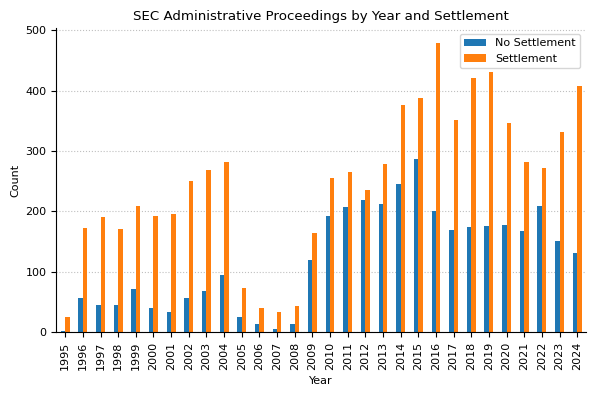

In [11]:
# stacked bar chart for hasAgreedToSettlement
fig, ax = plt.subplots(figsize=(6, 4))

df_year_settlement.drop(["total", "mean", "median"]).plot(
    kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"]
)

plt.title("SEC Administrative Proceedings by Year and Settlement")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["No Settlement", "Settlement"], loc="upper right")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Proceedings by Year And Count of Agreements to Pay Penalties

In [12]:
# piv table for hasAgreedToPayPenalty
# col = hasAgreedToPayPenalty (true, false), index = year, values = count of cases
df_year_penalty = unique_proceedings.pivot_table(
    index="releasedAtYear",
    columns="hasAgreedToPayPenalty",
    values="id",
    aggfunc="count",
    fill_value=0,
)

total_col = df_year_penalty.sum(axis=1)
mean_col = round(df_year_penalty.mean(axis=1), 0)
median_col = round(df_year_penalty.median(axis=1), 0)

total_row = df_year_penalty.sum(axis=0)
mean_row = round(df_year_penalty.mean(axis=0), 0)
median_row = round(df_year_penalty.median(axis=0), 0)

df_year_penalty.loc["total"] = total_row
df_year_penalty.loc["mean"] = mean_row
df_year_penalty.loc["median"] = median_row

df_year_penalty = df_year_penalty.astype(int)

df_year_penalty

hasAgreedToPayPenalty,False,True
releasedAtYear,,
1995,22,6
1996,179,49
1997,184,53
1998,158,58
1999,212,68
2000,167,67
2001,170,59
2002,238,69
2003,270,68


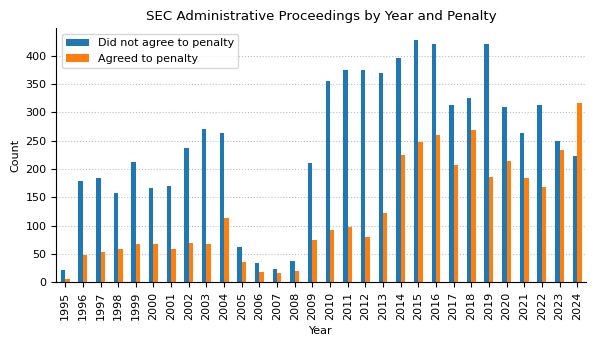

In [13]:
# stacked bar chart for hasAgreedToSettlement
fig, ax = plt.subplots(figsize=(6, 3.5))

df_year_penalty.drop(["total", "mean", "median"]).plot(
    kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"]
)

plt.title("SEC Administrative Proceedings by Year and Penalty")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(["Did not agree to penalty", "Agreed to penalty"], loc="upper left")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Penalty Amount Analysis

In [14]:
all_penalties = []
file_numbers = {}

# iterate over all rows, extract penalties and append to all_penalties
for i, row in unique_proceedings.iterrows():
    penaltyAmounts = row["penaltyAmounts"]

    if isinstance(penaltyAmounts, list):
        for penalty in penaltyAmounts:
            if "penaltyAmount" in penalty:
                # find entity with "name" == "imposedOn"
                entity = list(filter(lambda x: x["name"] == penalty["imposedOn"], row["entities"]))
                entity_type = entity[0]["type"] if entity else None

                all_penalties.append(
                    {
                        # "caseCitation": row['caseCitation'],
                        "fileNumber": row["fileNumbers"],
                        "releaseNo": row["releaseNo"],
                        "releasedAt": row["releasedAt"],
                        "releasedAtYear": row["releasedAtYear"],
                        "releasedAtMonth": row["releasedAtMonth"],
                        "amount": penalty["penaltyAmount"],
                        "imposedOn": penalty["imposedOn"],
                        "imposedOnType": entity_type,
                        # "url": row["url"],
                    }
                )

all_penalties_df = pd.DataFrame(all_penalties)
all_penalties_df["amount"] = all_penalties_df["amount"].astype(float)

# remove all doubles by caseCitation and imposedOn
all_penalties_df = all_penalties_df.drop_duplicates(
    subset=["fileNumber", "imposedOn", "amount"], keep="last"
)

all_penalties_df

,fileNumber,releaseNo,releasedAt,releasedAtYear,releasedAtMonth,amount,imposedOn,imposedOnType
0,3-22386,"[34-102060, AAER-4554]",2024-12-31 12:19:45-05:00,2024,12,75000.00,"Accell Audit & Compliance, PA",company
1,3-22384,"[34-102047, AAER-4553]",2024-12-27 17:12:33-05:00,2024,12,50000.00,Christopher Hiestand,individual
2,3-22382,[33-11349],2024-12-20 17:51:48-05:00,2024,12,73452756.00,Tai Mo Shan Limited,company
3,3-22382,[33-11349],2024-12-20 17:51:48-05:00,2024,12,12916153.00,Tai Mo Shan Limited,company
4,3-22382,[33-11349],2024-12-20 17:51:48-05:00,2024,12,36726378.00,Tai Mo Shan Limited,company
...,...,...,...,...,...,...,...,...
5933,3-8865,[34-36338],1995-10-05 09:11:20-04:00,1995,10,10000.00,John Laurienti,individual
5934,3-8865,[34-36338],1995-10-05 09:11:20-04:00,1995,10,50000.00,Dickinson & Co.,company
5935,3-8864,[34-36334],1995-10-04 09:11:20-04:00,1995,10,11402.50,Lewco Securities Corporation,company
5936,3-8863,[34-36333],1995-10-04 09:11:20-04:00,1995,10,107000.00,French American Banking Corporation,company


### Penalty Amount by Year

In [15]:
# aggregate amount by year
penalties_year = all_penalties_df.groupby("releasedAtYear")["amount"].sum()
penalties_year = penalties_year.astype(int)
penalties_year = pd.DataFrame(penalties_year)
penalties_year["amount"] = round(penalties_year["amount"] / 1_000_000, 2)
print("Total Penalties in Million USD by Year")
penalties_year

Total Penalties in Million USD by Year


,amount
releasedAtYear,
1995,5.22
1996,30.19
1997,20.13
1998,20.49
1999,54.28
2000,131.97
2001,635.92
2002,60.40
2003,431.53


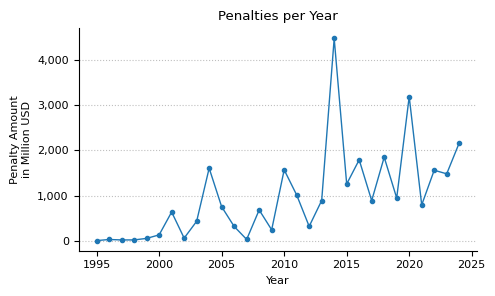

In [16]:
fig, ax = plt.subplots(figsize=(5, 3))

penalties_year["amount"].plot(
    kind="line",
    ax=ax,
    marker="o",
    markersize=3,
    linewidth=1,
)

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.set_title("Penalties per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Penalty Amount\nin Million USD")
plt.tight_layout()
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.show()

### Top 10 Penalty Amounts

In [17]:
# sort all penalties by amount, show top 10
top_10_penalties = all_penalties_df.sort_values("amount", ascending=False).head(10)
top_10_penalties["amount"] = round(top_10_penalties["amount"] / 1_000_000, 2)
top_10_penalties["amount"] = top_10_penalties["amount"].map("{:,.1f}".format)
print("Top 10 SEC Penalties in Million USD between 1995 and 2024")
top_10_penalties[['amount', 'imposedOn', 'releasedAt', 'releaseNo']]

Top 10 SEC Penalties in Million USD between 1995 and 2024


,amount,imposedOn,releasedAt,releaseNo
3808,900.0,"S.A.C. Capital Advisors, LLC",2014-06-27 09:21:21-04:00,[IA-3864]
3809,900.0,"CR Intrinsic Investors, LLC",2014-06-27 09:21:21-04:00,[IA-3864]
3810,900.0,"Sigma Capital Management, LLC",2014-06-27 09:21:21-04:00,[IA-3864]
3807,900.0,"S.A.C. Capital Advisors, L.P.",2014-06-27 09:21:21-04:00,[IA-3864]
2027,853.2,Petróleo Brasileiro S.A. – Petrobras,2018-09-27 09:24:56-04:00,"[33-10561, 34-84205, AAER-3989]"
944,675.0,Allianz Global Investors U.S. LLC,2022-05-17 09:28:19-04:00,"[34-94927, IA-6027]"
1345,606.3,"The Goldman Sachs Group, Inc.",2020-10-22 09:26:36-04:00,"[34-90243, AAER-4191]"
5341,606.0,Republic New York Securities Corp.,2001-12-17 08:12:59-05:00,[34-45157]
4329,583.5,Barry J. Minkow,2011-11-22 08:18:30-05:00,[IA-3320]
1449,556.7,Herbalife Nutrition Ltd.,2020-08-28 09:26:48-04:00,"[34-89704, AAER-4165]"


### Penalties by Type of Defendant

In [18]:
# create piv table across years and imposedOnType, with values = sum of penalties
penalties_entity_type = all_penalties_df.pivot_table(
    index="releasedAtYear",
    columns="imposedOnType",
    values="amount",
    aggfunc="sum",
    fill_value=0,
)

total_col = penalties_entity_type.sum(axis=1)
mean_col = round(penalties_entity_type.mean(axis=1), 0)
median_col = round(penalties_entity_type.median(axis=1), 0)

total_row = penalties_entity_type.sum(axis=0)
mean_row = round(penalties_entity_type.mean(axis=0), 0)
median_row = round(penalties_entity_type.median(axis=0), 0)

penalties_entity_type.loc["total"] = total_row
penalties_entity_type.loc["mean"] = mean_row
penalties_entity_type.loc["median"] = median_row

# format to million and , notation
penalties_entity_type = round(penalties_entity_type / 1_000_000, 2)
penalties_entity_type = penalties_entity_type.map("{:,.1f}".format)

print("SEC Penalties in Million USD by Year and Entity Type")

penalties_entity_type = penalties_entity_type[['company', 'individual']]
penalties_entity_type

SEC Penalties in Million USD by Year and Entity Type


imposedOnType,company,individual
releasedAtYear,,
1995,5.2,0.0
1996,21.2,8.9
1997,11.6,5.8
1998,13.4,3.3
1999,51.3,1.9
2000,119.7,12.2
2001,607.9,28.0
2002,13.4,46.9
2003,375.4,56.0


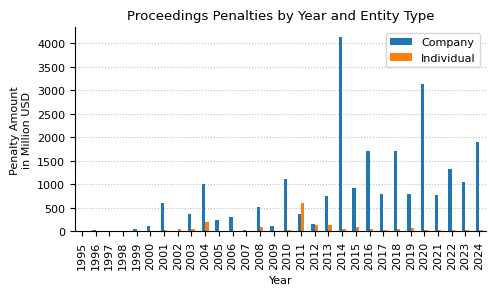

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))

data_to_plot = penalties_entity_type.loc[1995:2024].map(
    lambda x: float(x.replace(",", ""))
)

data_to_plot.plot(kind="bar", stacked=False, ax=ax, color=["#1f77b4", "#ff7f0e"])

plt.title("Proceedings Penalties by Year and Entity Type")
plt.xlabel("Year")
plt.ylabel("Penalty Amount\nin Million USD")
plt.legend(["Company", "Individual"], loc="upper right")
plt.grid(axis="x")
ax.set_axisbelow(True)
plt.tight_layout()
plt.show()

## Proceedings by Category

In [20]:
all_tags = []

for i, row in unique_proceedings.iterrows():
    tags = row["tags"]
    if isinstance(tags, list):
      all_tags.extend(tags)

all_tags = pd.Series(all_tags)
all_tags = all_tags.value_counts().reset_index()
all_tags.columns = ["tag", "count"]

print("Top 10 Tags in SEC Administrative Proceedings")
all_tags.head(10)

Top 10 Tags in SEC Administrative Proceedings


,tag,count
0,securities fraud,2115
1,delinquent filings,1676
2,disclosure fraud,1336
3,fraud,894
4,accounting fraud,743
5,unregistered securities,634
6,securities violation,532
7,investment adviser,499
8,insider trading,464
9,misrepresentation,395


## Requested Reliefs by Category

In [21]:
# count all unique requestedRelief
all_requested_relief = []

for i, row in unique_proceedings.iterrows():
    requestedRelief = row["requestedRelief"]
    if isinstance(requestedRelief, list):
        all_requested_relief.extend(requestedRelief)

all_requested_relief = pd.DataFrame(all_requested_relief, columns=["requestedRelief"])

all_requested_relief["requestedRelief"] = (
    all_requested_relief["requestedRelief"]
    .str.replace("cease-and-desist order", "cease and desist order")
    .replace("permanent injunctions", "permanent injunction")
)

all_requested_relief = all_requested_relief.value_counts().reset_index()

print("Top 10 Requested Reliefs in SEC Administrative Proceedings")
all_requested_relief.head(10)

Top 10 Requested Reliefs in SEC Administrative Proceedings


,requestedRelief,count
0,civil penalties,2591
1,disgorgement of profits,2045
2,cease and desist order,1709
3,permanent injunction,913
4,suspend or revoke the registration of each cla...,635
5,censure,466
6,civil money penalty,378
7,suspend for a period not exceeding twelve months,287
8,revoke the registration of each class of secur...,285
9,disgorgement,234


## Violated Securities Laws

In [22]:
# count all unique violatedSections
all_violated_sections = []

for i, row in unique_proceedings.iterrows():
    violatedSections = row["violatedSections"]
    if isinstance(violatedSections, list):
        all_violated_sections.extend(violatedSections)

all_violated_sections = pd.Series(all_violated_sections)
all_violated_sections = all_violated_sections.value_counts().reset_index()

all_violated_sections.columns = ["violatedSections", "count"]

print("Top 10 Violated Securities Laws in SEC Administrative Proceedings")
all_violated_sections.head(10)

Top 10 Violated Securities Laws in SEC Administrative Proceedings


,violatedSections,count
0,Rule 10b-5,2547
1,Exchange Act Section 13(a),1701
2,Section 10(b) of the Exchange Act,1445
3,Rules 13a-1 and 13a-13,1251
4,Section 17(a) of the Securities Act of 1933,1137
5,Section 10(b) of the Securities Exchange Act o...,699
6,Section 17(a) of the Securities Act,570
7,Rules 13a-1,528
8,Section 13(a) of the Exchange Act,492
9,Rules 13a-13,472
